In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

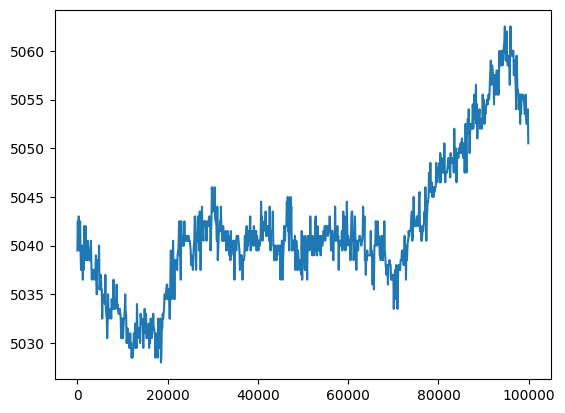

In [4]:
day_neg_one = pd.read_csv('Day_-1.csv', delimiter=';')
day_neg_two = pd.read_csv('Day_-2.csv', delimiter=';')
day_zero = pd.read_csv('Day_0.csv', delimiter=';')
day_one = pd.read_csv('Day_1.csv')

cum_data = pd.concat([day_neg_two, day_neg_one, day_zero, day_one])
cum_data.reset_index(inplace=True)

cum_star = cum_data[cum_data['product'] == 'STARFRUIT']
cum_star.reset_index(inplace=True)

star_day_one = day_one[day_one['product'] == 'STARFRUIT']
star_day_one.set_index('timestamp', inplace=True)

plt.plot(star_day_one.index, star_day_one['mid_price'])

a,b,c,d,intercept = np.polyfit(star_day_one.index, star_day_one['mid_price'], 4)

